In [4]:
# =============================================
# Logistic Regression on Titanic Dataset
# =============================================

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
)

# =============================================
# 2. Load Dataset
# =============================================
train_df = pd.read_csv("C:\\Users\\Sindu\\Desktop\\Assignment ExcelR\\Logistic Regression\\Logistic Regression\\Titanic_train.csv")
test_df = pd.read_csv("C:\\Users\\Sindu\\Desktop\\Assignment ExcelR\\Logistic Regression\\Logistic Regression\\Titanic_test.csv")

print("Train Shape:", train_df.shape)
print("Test Shape:", test_df.shape)

Train Shape: (891, 12)
Test Shape: (418, 11)



--- First 5 rows of train dataset ---


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

--- Summary Statistics ---
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.6991

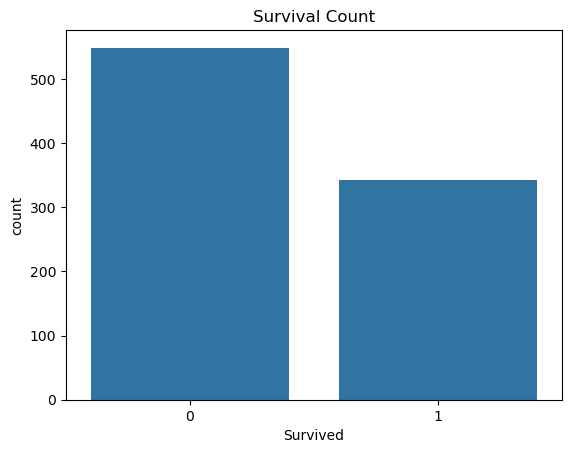

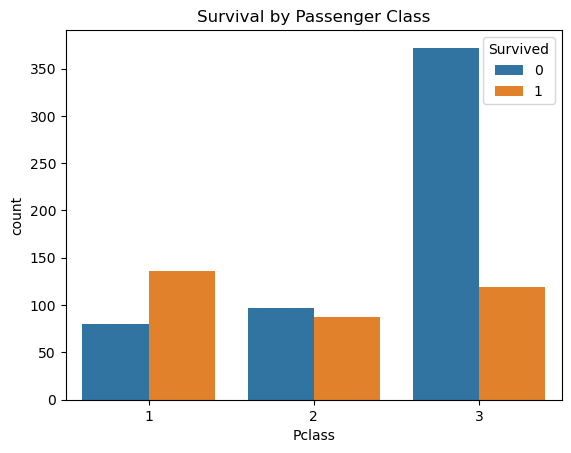

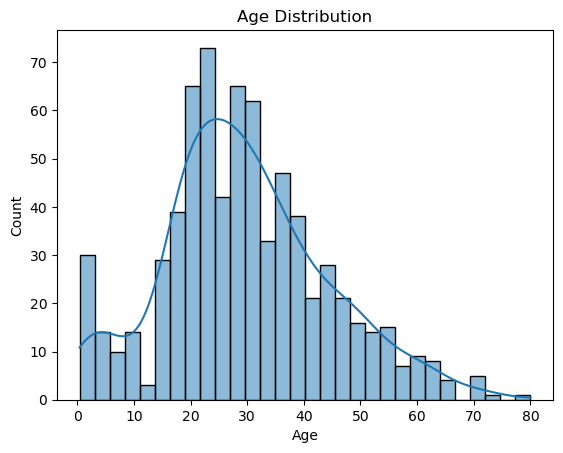

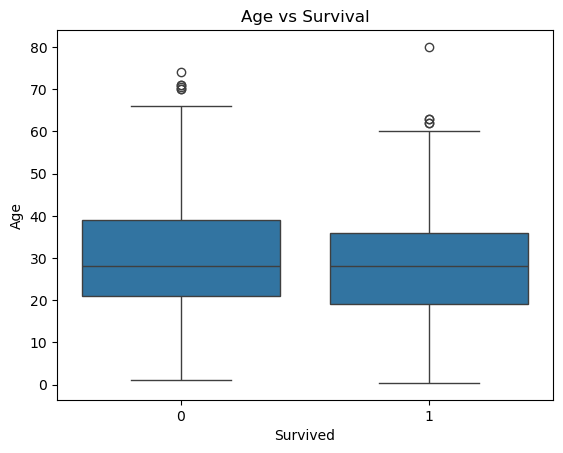

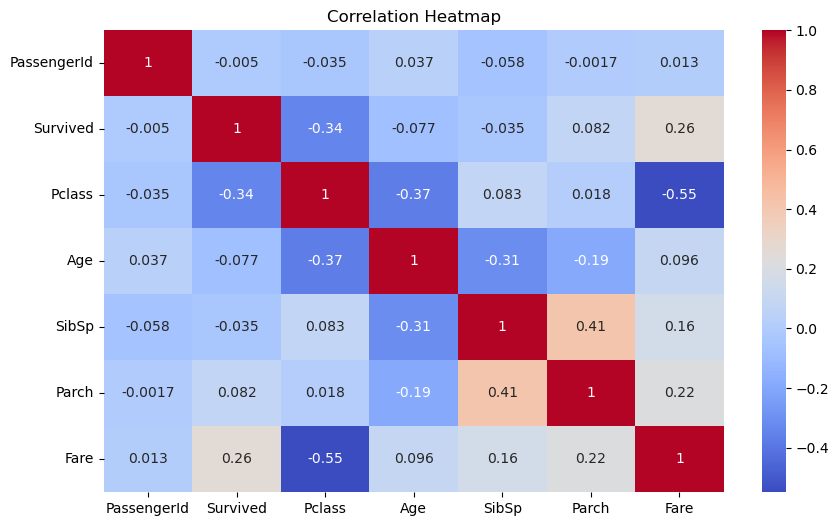

In [8]:
# =============================================
# 3. Exploratory Data Analysis (EDA)
# =============================================

print("\n--- First 5 rows of train dataset ---")
display(train_df.head())

print("\n--- Data Info ---")
print(train_df.info())

print("\n--- Summary Statistics ---")
print(train_df.describe())

# Missing values check
print("\n--- Missing Values ---")
print(train_df.isnull().sum())

# Visualizations
sns.countplot(x='Survived', data=train_df)
plt.title("Survival Count")
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title("Survival by Passenger Class")
plt.show()

sns.histplot(train_df['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

sns.boxplot(x='Survived', y='Age', data=train_df)
plt.title("Age vs Survival")
plt.show()

# Correlation Heatmap (numeric columns only)
plt.figure(figsize=(10,6))
numeric_df = train_df.select_dtypes(include=[np.number])  # keep only numeric
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [18]:
# ================================================
# 4. Preprocessing + Feature Selection 
# ================================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# --- 1. Handle Missing Values ---
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)

test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# --- 2. Drop Irrelevant Columns ---
drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']
train_df.drop(columns=drop_cols, inplace=True, errors='ignore')
test_df.drop(columns=drop_cols, inplace=True, errors='ignore')

# --- 3. Encode Categorical Variables ---
le = LabelEncoder()
for col in ['Sex', 'Embarked']:
    if col in train_df.columns:
        train_df[col] = le.fit_transform(train_df[col])
        test_df[col] = le.transform(test_df[col])

# --- 4. Split Features & Target ---
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 5. Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

print("✅ Preprocessing Done!")
print("X_train shape:", X_train_scaled.shape)
print("X_val shape:", X_val_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

print("\nFinal Features:", X.columns.tolist())


✅ Preprocessing Done!
X_train shape: (712, 7)
X_val shape: (179, 7)
y_train shape: (712,)
y_val shape: (179,)

Final Features: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


C:\Users\Sindu\AppData\Local\Temp\ipykernel_10560\1249596184.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
C:\Users\Sindu\AppData\Local\Temp\ipykernel_10560\1249596184.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [20]:
# =============================================
# 6. Model Building
# =============================================

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       110
           1       0.78      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179

Accuracy: 0.7988826815642458
Precision: 0.7796610169491526
Recall: 0.6666666666666666
F1-Score: 0.71875
ROC-AUC Score: 0.8519104084321476


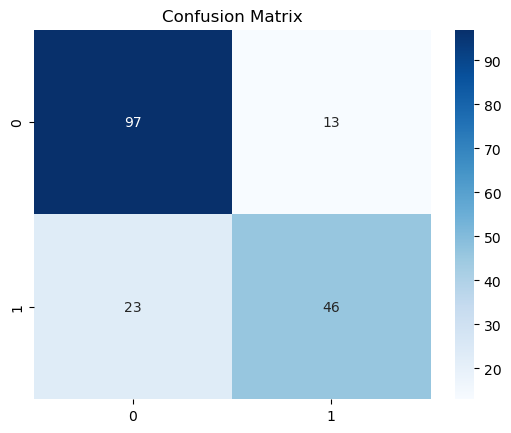

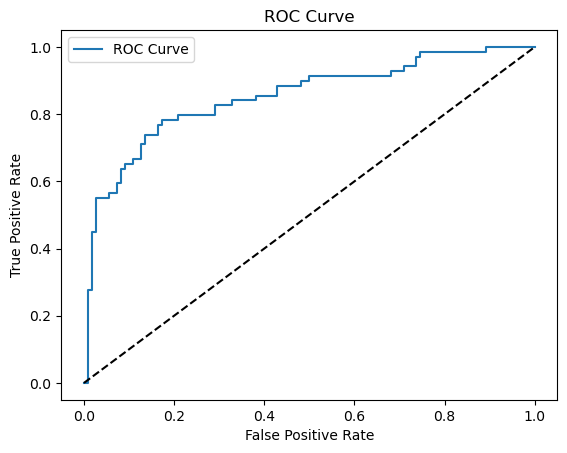

In [22]:
# =============================================
# 7. Model Evaluation
# =============================================

y_pred = model.predict(X_val_scaled)
y_prob = model.predict_proba(X_val_scaled)[:,1]

print("\n--- Classification Report ---")
print(classification_report(y_val, y_pred))

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1-Score:", f1_score(y_val, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_val, y_prob))

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [24]:
# =============================================
# 8. Interpretation of Coefficients
# =============================================

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
coef_df['Importance'] = np.exp(coef_df['Coefficient'])  # Odds ratio
print("\n--- Feature Importance (Odds Ratios) ---")
print(coef_df.sort_values(by='Importance', ascending=False))


--- Feature Importance (Odds Ratios) ---
    Feature  Coefficient  Importance
5      Fare     0.098486    1.103499
4     Parch    -0.082296    0.920999
6  Embarked    -0.184912    0.831178
3     SibSp    -0.265111    0.767121
2       Age    -0.495228    0.609432
0    Pclass    -0.889408    0.410899
1       Sex    -1.285336    0.276558


In [26]:
# =============================================
# 9. Prepare for Streamlit Deployment
# =============================================

import pickle

# Save model and scaler for deployment
with open("logistic_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("\n✅ Model and Scaler saved for Streamlit Deployment")


✅ Model and Scaler saved for Streamlit Deployment


In [ ]:
Interview Questions:

1. What is the difference between Precision and Recall?

* Precision: Out of all the predicted positives, how many are actually positive?
             Precision=True Positives/True Positives + False Positives
→ It measures the accuracy of positive predictions.

* Recall (Sensitivity / True Positive Rate): Out of all the actual positives, how many did the model correctly identify?
                                             Recall=True Positives/True Positives + False Negatives
→ It measures the ability to find all positive cases.

* Difference: Precision focuses on quality of positive predictions.
              Recall focuses on quantity of positive predictions.

* Example:In disease detection: High recall is critical (catch all sick patients).
          In spam detection: High precision is critical (avoid marking normal emails as spam).

In [ ]:
2. What is Cross-Validation, and why is it important in Binary Classification?

* Cross-validation is a resampling technique where the dataset is split into multiple folds (e.g., 5 or 10).

* The model is trained on some folds and tested on the remaining fold, rotating until every fold has been used for testing.

* Example: 5-fold CV → Dataset split into 5 parts, train on 4, test on 1, repeat 5 times, then average the results.

* Importance in Binary Classification: Prevents overfitting by testing model performance on unseen data.
                                       Provides a more reliable estimate of model accuracy than a single train-test split.
                                       Useful when data is limited.
                                       Ensures class balance (via stratified CV) in binary classification so both classes are fairly represented in each fold.